In [2]:
import pandas as pd
import numpy as np
import re
import os
import multiprocessing as mp
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [ ]:
num_to_categ
# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenTop_SetV  :  8 

# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenBot_SetV  :  9 

In [3]:
data = pd.read_table('../relevant/data560.txt',index_col=False)

In [34]:
data

,time,GFC.Ai._aiGfcPrsAirBlw,GFC.GlobVar.AccPyr.Pyr[5].Tmp,GFC.GlobVar.AccPyr.Pyr[6].Tmp,GFC.GlobVar.AccPyr.Pyr[7].Tmp,GFC.GlobVar.AccPyr.Pyr[8].Tmp,GFC.GlobVar.AccPyr.Pyr[14].Tmp,GfcPdiIdSeq1_Date_ActV,GfcPdiIdSeq1_Number_ActV,GfcPdiIdSeq2_Date_ActV,...,BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[25],BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[26],BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[27],BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[28],BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[29],BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[30],BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[31],BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[32],id1,id2
0,21.01.2017 15:34:26.388000,6.58264,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.090637,0.112610,1.82236,0.471039,0.060425,0.067291,0.024719,0.711365,20000000000,2017012100770000
1,21.01.2017 15:34:26.988000,6.59271,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.102997,0.090637,1.77292,0.454559,0.048065,0.000000,0.155182,0.796509,20000000000,2017012100770000
2,21.01.2017 15:34:27.588000,6.58112,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.096130,0.031586,1.85394,0.561676,0.076904,0.083771,0.090637,0.767670,20000000000,2017012100770000
3,21.01.2017 15:34:28.188000,6.58981,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.064545,0.041199,1.84433,0.497131,0.109863,0.074158,0.112610,0.812988,20000000000,2017012100770000
4,21.01.2017 15:34:28.788000,6.58554,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.048065,0.024719,1.70425,0.497131,0.043945,0.090637,0.076904,0.689392,20000000000,2017012100770000
5,21.01.2017 15:34:29.388000,6.58691,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.041199,0.142822,1.81274,0.435333,0.129089,0.090637,0.112610,0.734711,20000000000,2017012100770000
6,21.01.2017 15:34:29.988000,6.58981,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.005493,0.081024,1.91986,0.480652,0.008240,0.096130,0.083771,0.894012,20000000000,2017012100770000
7,21.01.2017 15:34:30.588000,6.58981,600.000,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.041199,0.093384,1.74683,0.464172,0.190887,0.000000,0.031586,0.796509,20000000000,2017012100770000
8,21.01.2017 15:34:31.188000,6.59424,618.356,600.000,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.038452,0.064545,1.88416,0.421600,0.070038,0.031586,0.109863,0.796509,20000000000,2017012100770000
9,21.01.2017 15:34:31.788000,6.58554,736.566,724.268,150.000,150.000,150.000,0.0,0.0,170121.0,...,0.086517,0.031586,1.62598,0.444946,0.107117,0.138702,0.000000,0.715485,20000000000,2017012100770000


In [7]:
todrop = []
for col in [c for c in data.columns if data[c].dtype.name != 'object']:
    if len(data[col].unique())<2:
        todrop.append(col)
        print col, ' : ', len(data[col].unique()), '\n'

GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiBtmTopFlwRatioManRef_ActV  :  1 

GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenTop_SetV  :  1 

GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenBot_SetV  :  1 

SCC._SccRtData.SccRtData.SccRefPrsPmp  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[11]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[11]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[11]  :  1 

THC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[15]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[11]  :  1 

THC.GlobVar.AccCtrlInput_Out.SpecFlwRef[11]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[20]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[21]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[22]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[23]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[24]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[20]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[20]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[21]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[22]  :  

In [8]:
data.drop(todrop, axis=1, inplace=1)

In [9]:
def VarianceThreshold_selector(X):
    columns = X.columns
    selector = VarianceThreshold(threshold=(.99*(1-.99)))
    selector.fit_transform(X)
    labels = [columns[x] for x in selector.get_support(indices=True) if x]
    return pd.DataFrame(X[labels], columns=labels)

numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

In [10]:
data1_temp = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[1]']>139)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[1]']<206)]
data2_temp = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[2]']>139)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<206)]

In [11]:
data1 = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[1]']>=148.83)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<=185.83)]
data2 = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[2]']>=148.83)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<=185.83)]

In [12]:
data1_var = VarianceThreshold_selector(data1[numerical_columns])
data2_var = VarianceThreshold_selector(data2[numerical_columns])

In [13]:
[col for col in data1_var.columns if col not in data2_var.columns]

['GFC.GlobVar.AccTrkMap.PltSpdCol[2]',
 'BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk[18]']

In [14]:
[col for col in data2_var.columns if col not in data1_var.columns]

['GFC.GlobVar.GfcLocRtData.GfcSccWatPrsScc']

In [15]:
data1.loc[data1['GFC.GlobVar.AccTrkMap.PltSpdCol[2]']<0]['GSF.GlobVar.AccTrkMap.PosHeadCol[1]'].max()

240.041

In [17]:
np.var(data2['GFC.GlobVar.AccTrkMap.PltSpdCol[2]'])

0.0035131742335688895

In [18]:
data2.shape

(9205, 433)

In [35]:
data2_var.shape

(9205, 378)

In [19]:
 data2['GFC.GlobVar.AccTrkMap.PltSpdCol[2]'].min()

1.1728700000000001

In [20]:
data1.id1.unique().tolist()

[2017012100780000,
 2017012100800000,
 2017012100820000,
 2017012100840000,
 2017012100860000,
 2017012100880000,
 2017012100900000,
 2017012100920000,
 2017012100940000,
 2017012100960000,
 2017012100980000,
 2017012101000000,
 2017012101020000,
 2017012101040000,
 2017012101080000,
 2017012100700000,
 2017012101100000,
 2017012101120000,
 2017012101140000,
 2017012100720000,
 2017012100740000,
 2017012100760000,
 2017012300310000,
 2017012300330000,
 2017012300350000,
 2017012300370000,
 2017012300380000,
 2017012300390000,
 2017012300410000,
 2017012300430000,
 2017012300450000,
 2017012300470000,
 2017012300490000,
 2017012300510000,
 2017012300530000,
 2017012300550000,
 2017012300580000,
 2017012300600000,
 2017012300700000,
 2017012300720000,
 2017012300740000,
 2017012300760000,
 2017012300780000,
 2017012300800000,
 2017012300820000,
 2017012300840000,
 2017012300860000,
 2017012300880000,
 2017012300900000,
 2017012300620000,
 2017012300920000,
 2017012300940000,
 20170123009

In [36]:
print len(data1)
print len(data2)
print len(data)
print len(data1)+len(data2)

16768
9205
37020
25973


In [237]:
data1_temp['pltid'] = data1['id1']
data2_temp['pltid'] = data2['id2']

data1['pltid'] = data1['id1']
data2['pltid'] = data2['id2']

/home/gis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/gis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/gis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
num_to_categ
# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenTop_SetV  :  8 

# GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenBot_SetV  :  9 

In [21]:
data1_var['GFC.GlobVar.AccTrkMap.PltSpdCol[1]'].min()


-0.19350100000000001

In [22]:
c = data1.loc[data1['GFC.GlobVar.AccTrkMap.PltSpdCol[1]']>2.5].id1.unique().tolist()

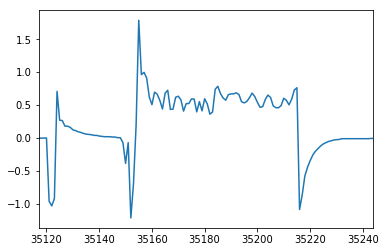

In [232]:
(data1.loc[data1.pltid== 2016092300590000]['PRC.GlobVar.PrcLocRtData.Prc1PosRef'] - data1.loc[data1.pltid== 2016092300590000]['PRC.GlobVar.PrcLocRtData.PrcPosActDs1']).plot()
plt.show()

In [24]:
l = pd.read_csv('../relevant/dataset120517.csv', sep=';') #

In [25]:
l.loc[(l.NOT_IN_40_0C==0)]['IS_FIRST'].sum()

85

In [60]:
l.loc[l.PIECE_ID==2016101701240000]['TMP_STP_ALL_AVG']

4032    549.561035
Name: TMP_STP_ALL_AVG, dtype: float64

In [100]:


l.loc[l.PIECE_ID.isin(data1.id1.unique().tolist())]['NOT_IN_40_0C'].sum()/float(len(data1.id1.unique()))

0.0106951871657754

In [23]:
float(len(data1.id1.unique()))

126.0

In [33]:
l.loc[l.PIECE_ID.isin(data1.id1.unique().tolist())]['NOT_IN_40_0C'].sum()/float(len(data1.id1.unique()))

0.0

In [28]:
l.loc[l.PIECE_ID.isin(data2.id2.unique().tolist())]['NOT_IN_25_0C'].sum()

2

In [32]:
l.NOT_IN_40_0C.value_counts()

0    9310
1      66
Name: NOT_IN_40_0C, dtype: int64

In [6]:
#sort by time
# dist btw lists
#время охлаждения
df = pd.concat([data1, data2],ignore_index=1)